In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [3]:
img = image.load_img("basedata/train/Gota_existente/e766a563-c87a-4d14-ae00-898ce62e15d4___RS_LB 5123.JPG")

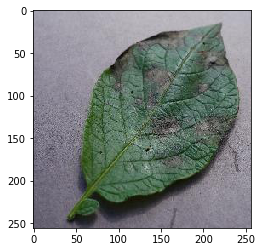

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("basedata/train/Gota_existente/e766a563-c87a-4d14-ae00-898ce62e15d4___RS_LB 5123.JPG").shape

(256, 256, 3)

In [6]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [7]:
train_dataset = train.flow_from_directory('basedata/train/',
                                         target_size= (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('basedata/validation/',
                                         target_size= (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 242 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [8]:
train_dataset.class_indices

{'Gota_existente': 0, 'Gota_inexistente': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation= 'relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')        
                                   ])

In [11]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics =['accuracy'])

In [12]:
model_fit = model.fit(train_dataset,
                 steps_per_epoch = 10,
                 epochs= 30,
                 validation_data= validation_dataset)

Epoch 1/30
10/10 [==============================] - 6s 381ms/step - loss: 7.4103 - accuracy: 0.3869
Epoch 2/30
10/10 [==============================] - 4s 348ms/step - loss: 0.8169 - accuracy: 0.6265
Epoch 3/30
10/10 [==============================] - 4s 349ms/step - loss: 0.6930 - accuracy: 0.7796
Epoch 4/30
10/10 [==============================] - 4s 345ms/step - loss: 0.7867 - accuracy: 0.6421
Epoch 5/30
10/10 [==============================] - 4s 354ms/step - loss: 1.9897 - accuracy: 0.4453
Epoch 6/30
10/10 [==============================] - 4s 358ms/step - loss: 0.6142 - accuracy: 0.7832
Epoch 7/30
10/10 [==============================] - 4s 353ms/step - loss: 0.6607 - accuracy: 0.6795
Epoch 8/30
10/10 [==============================] - 4s 357ms/step - loss: 0.6065 - accuracy: 0.6059
Epoch 9/30
10/10 [==============================] - 3s 345ms/step - loss: 0.6549 - accuracy: 0.6708
Epoch 10/30
10/10 [==============================] - 4s 353ms/step - loss: 0.8956 - accuracy: 0.5610

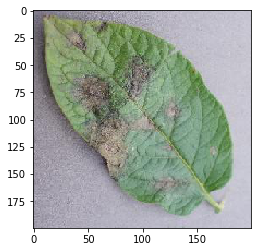

Gota_existente


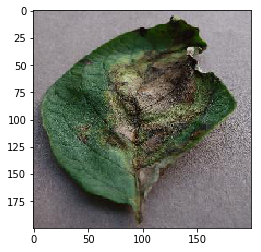

Gota_existente


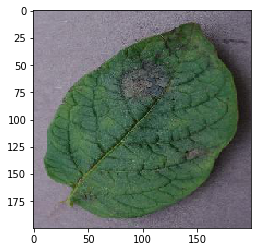

Gota_inexistente


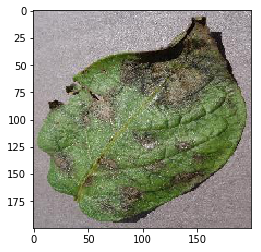

Gota_existente


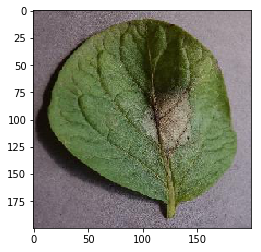

Gota_existente


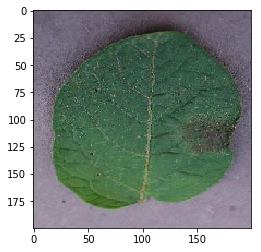

Gota_inexistente


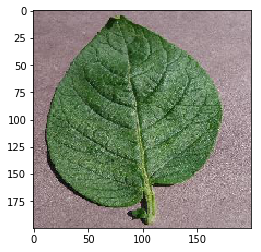

Gota_inexistente


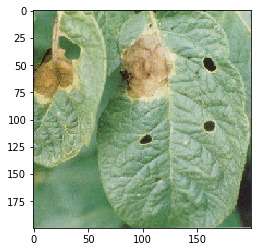

Gota_existente


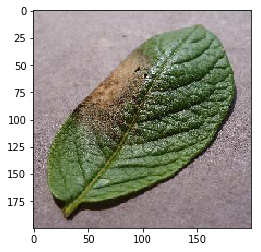

Gota_existente


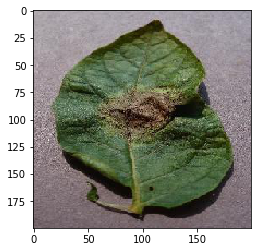

Gota_existente


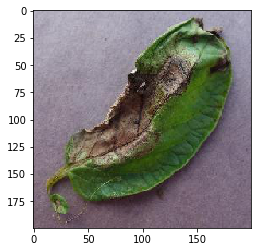

Gota_existente


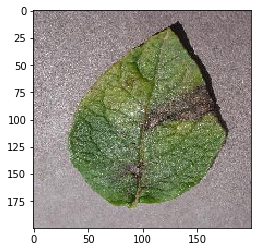

Gota_existente


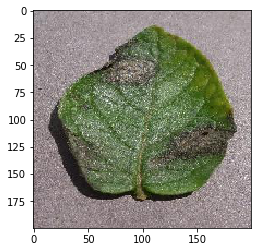

Gota_existente


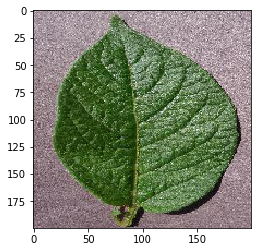

Gota_inexistente


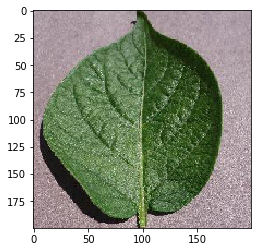

Gota_inexistente


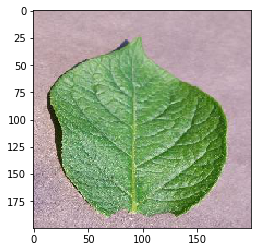

Gota_inexistente


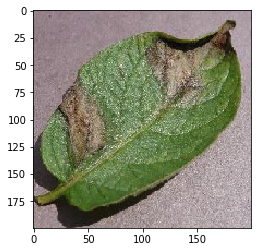

Gota_existente


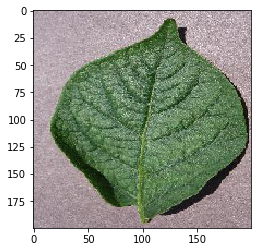

Gota_inexistente


In [13]:
dir_path = 'basedata/test'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("Gota_existente")
    else:
        print("Gota_inexistente")
    

In [14]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [15]:
ls saved_model

my_model/


In [16]:
ls saved_model/my_model

assets/         saved_model.pb  variables/


In [17]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [18]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

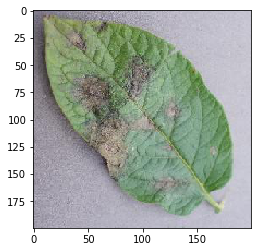

Gota_existente


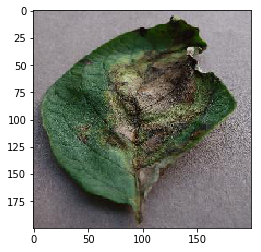

Gota_existente


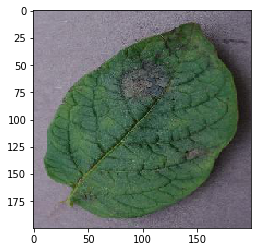

Gota_inexistente


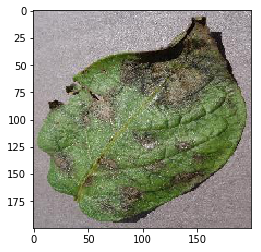

Gota_existente


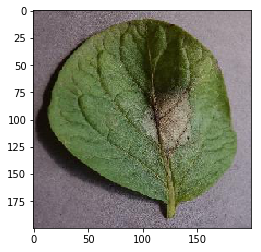

Gota_existente


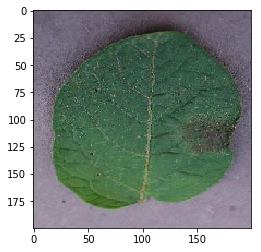

Gota_inexistente


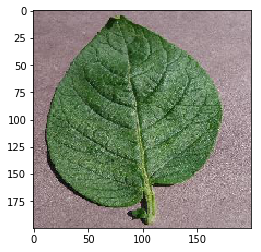

Gota_inexistente


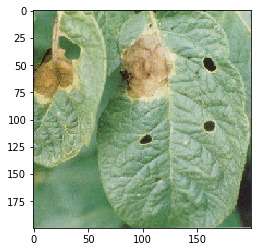

Gota_existente


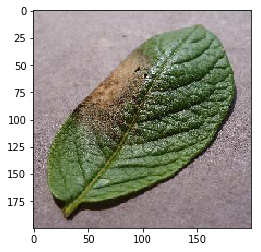

Gota_existente


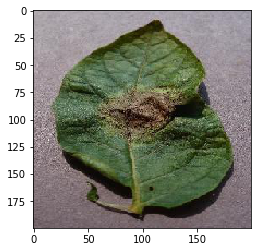

Gota_existente


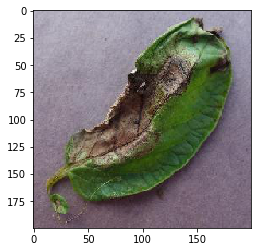

Gota_existente


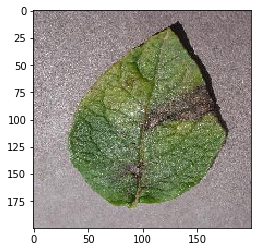

Gota_existente


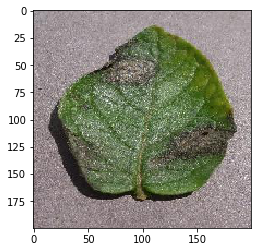

Gota_existente


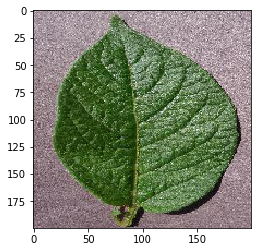

Gota_inexistente


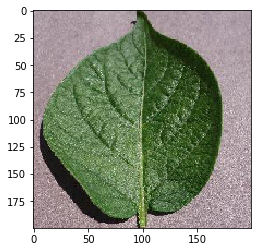

Gota_inexistente


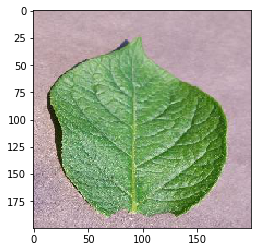

Gota_inexistente


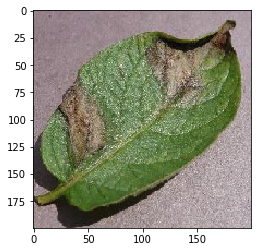

Gota_existente


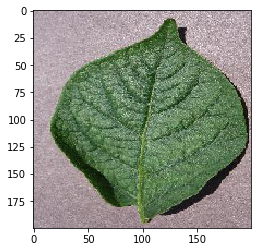

Gota_inexistente


In [19]:
dir_path = 'basedata/test'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    
    val = new_model.predict(images)
    if val == 0:
        print("Gota_existente")
    else:
        print("Gota_inexistente")